In [1]:
import config

In [2]:
config.print_config()

Configuration:
Data Directory: C:/Users/edvar/PycharmProjects/miniFrance_project/data
Image Size: (1000, 1000)
Number of Classes: 16
Backboneresnet50, is pretrained? True
Devide for torch: cuda


In [2]:
import os
import logging
import numpy as np
import torch
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import  reshape_as_image
from PIL import Image
from torchvision.io import read_image
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import config

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)


class MiniFranceDataset(Dataset):
    def __init__(self, transform=None):
        self.image_dir = config.TRAIN_IMAGE_DIR
        self.mask_dir = config.TRAIN_MASK_DIR
        self.image_files = os.listdir(config.TRAIN_IMAGE_DIR)
        self.trasformation = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_filename = self.image_files[idx]
        image_path = os.path.join(self.image_dir, image_filename)
        # mask_path = os.path.join(self.mask_dir, f"mask_{os.path.splitext(image_filename)[0]}.tif")

        image = reshape_as_image(rasterio.open(image_path).read())
        # image = ToTensor()(image)
        # mask = Image.open(mask_path).convert('RGB')
        # mask = ToTensor()(mask)

        # if self.trasformation:
        #     image = self.trasformation(image)
        #     # mask = self.transform(mask)

        return image_path
    
data = MiniFranceDataset()
    # print(data.image_files)

print(data[0])
# for i, image in enumerate(data):
#     print(image.size)

C:/Users/edvar/PycharmProjects/miniFrance_project/data\train_images\D006_0990-6305_25.tif


C:\Users\edvar\miniconda3\envs\miniFrance_project\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [3]:
image_array = rasterio.open('C:/Users/edvar/PycharmProjects/miniFrance_project/data/train_images\D006_0990-6305_25.tif').read()
image_array = reshape_as_image(image_array)

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(image_array)
plt.show()

In [1]:
import torch

torch.cuda.empty_cache()

In [2]:
torch.cuda.is_available()

True

In [7]:
import hyperparameter_config
for value in hyperparameter_config.__repr__:
    print(f"{value}")

TypeError: 'method-wrapper' object is not iterable

In [8]:
hyperparameter_config.__repr__

<method-wrapper '__repr__' of module object at 0x000001EF1664A160>

In [4]:
import os

import rasterio
from rasterio.plot import  reshape_as_image


# Mean and standard deviation for image normalization, that are used for pretrained DeepLabV3
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

mask = rasterio.open('../data/train_masks/mask_D006_1000-6340_16.tif').read()
mask

C:\Users\edvar\miniconda3\envs\miniFrance_project\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


array([[[11, 11, 11, ..., 10, 10, 10],
        [11, 11, 11, ..., 10, 10, 10],
        [11, 11, 11, ..., 10, 10, 10],
        ...,
        [12, 12, 12, ..., 10, 10, 10],
        [12, 12, 12, ..., 10, 10, 10],
        [12, 12, 12, ..., 10, 10, 10]]], dtype=uint8)

In [13]:
mask.shape

(1, 1000, 1000)

In [10]:
reshaped_data = mask.reshape(-1, mask.shape[-1])

In [11]:
import numpy as np

reshaped_data = np.unique(reshaped_data, axis=0)
reshaped_data

array([[ 7,  7,  7, ..., 10, 10, 10],
       [ 7,  7,  7, ..., 10, 10, 10],
       [ 7,  7,  7, ..., 10, 10, 10],
       ...,
       [12, 12, 12, ..., 10, 10, 10],
       [12, 12, 12, ..., 10, 10, 10],
       [12, 12, 12, ..., 10, 10, 10]], dtype=uint8)

In [74]:
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [76]:
class_frequencies = []
import rasterio
from rasterio.plot import  reshape_as_image

for root, dirs, files in os.walk('../data/supervised_dataset/masks'):
    for img in files:
        mask = rasterio.open(f'../data/supervised_dataset/masks/{img}').read()
        class_counts = np.bincount(mask.flatten(), minlength=16)
        class_frequencies.append(class_counts)

np.array(class_frequencies)

C:\Users\edvar\miniconda3\envs\miniFrance_project\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


array([[    0, 13890,  2302, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       ...,
       [    0,     0,   435, ...,     0,     0,     0],
       [    0,  7438,     0, ...,     0,     0,     0],
       [    0, 62117, 29890, ...,     0,     0,     0]], dtype=int64)

In [77]:
np.array(class_frequencies).shape

(1798, 16)

In [78]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(np.array(class_frequencies))

C:\Users\edvar\miniconda3\envs\miniFrance_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [82]:
clusters

array([0, 0, 0, ..., 0, 0, 4])

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
X_train_labeled, X_val_labeled, y_train_labeled, y_val_labeled = train_test_split(
    os.listdir(config.SUPERVISED_TRAIN_IMAGE_DIR), os.listdir('../data/supervised_dataset/masks'), stratify=clusters)
X_train_labeled

['D014_0440-6890_47.tif',
 'D014_0450-6900_20.tif',
 'D059_0705-7070_65.tif',
 'D006_1010-6365_66.tif',
 'D029_0170-6765_89.tif',
 'D059_0655-7100_64.tif',
 'D056_0270-6770_18.tif',
 'D059_0700-7070_66.tif',
 'D014_0440-6915_32.tif',
 'D059_0705-7025_49.tif',
 'D022_0275-6845_85.tif',
 'D056_0315-6735_82.tif',
 'D029_0140-6850_86.tif',
 'D006_1020-6345_74.tif',
 'D072_0495-6760_2.tif',
 'D014_0420-6895_88.tif',
 'D056_0215-6765_2.tif',
 'D014_0470-6900_16.tif',
 'D044_0335-6710_30.tif',
 'D029_0160-6855_7.tif',
 'D006_1000-6370_87.tif',
 'D029_0125-6840_65.tif',
 'D072_0485-6765_80.tif',
 'D029_0155-6775_40.tif',
 'D059_0725-7035_15.tif',
 'D014_0425-6885_17.tif',
 'D014_0420-6920_40.tif',
 'D014_0460-6865_21.tif',
 'D059_0670-7090_35.tif',
 'D072_0465-6750_27.tif',
 'D056_0300-6725_26.tif',
 'D044_0360-6760_41.tif',
 'D059_0730-7015_98.tif',
 'D056_0210-6775_44.tif',
 'D059_0725-7050_86.tif',
 'D029_0135-6860_27.tif',
 'D006_1025-6325_54.tif',
 'D006_1025-6315_21.tif',
 'D029_0150-678

In [99]:
y_train_labeled

['mask_D014_0440-6890_47.tif',
 'mask_D014_0450-6900_20.tif',
 'mask_D059_0705-7070_65.tif',
 'mask_D006_1010-6365_66.tif',
 'mask_D029_0170-6765_89.tif',
 'mask_D059_0655-7100_64.tif',
 'mask_D056_0270-6770_18.tif',
 'mask_D059_0700-7070_66.tif',
 'mask_D014_0440-6915_32.tif',
 'mask_D059_0705-7025_49.tif',
 'mask_D022_0275-6845_85.tif',
 'mask_D056_0315-6735_82.tif',
 'mask_D029_0140-6850_86.tif',
 'mask_D006_1020-6345_74.tif',
 'mask_D072_0495-6760_2.tif',
 'mask_D014_0420-6895_88.tif',
 'mask_D056_0215-6765_2.tif',
 'mask_D014_0470-6900_16.tif',
 'mask_D044_0335-6710_30.tif',
 'mask_D029_0160-6855_7.tif',
 'mask_D006_1000-6370_87.tif',
 'mask_D029_0125-6840_65.tif',
 'mask_D072_0485-6765_80.tif',
 'mask_D029_0155-6775_40.tif',
 'mask_D059_0725-7035_15.tif',
 'mask_D014_0425-6885_17.tif',
 'mask_D014_0420-6920_40.tif',
 'mask_D014_0460-6865_21.tif',
 'mask_D059_0670-7090_35.tif',
 'mask_D072_0465-6750_27.tif',
 'mask_D056_0300-6725_26.tif',
 'mask_D044_0360-6760_41.tif',
 'mask_D059

In [87]:
len(X_train_labeled)

1348

In [88]:
len(X_val_labeled)

450

In [44]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5])

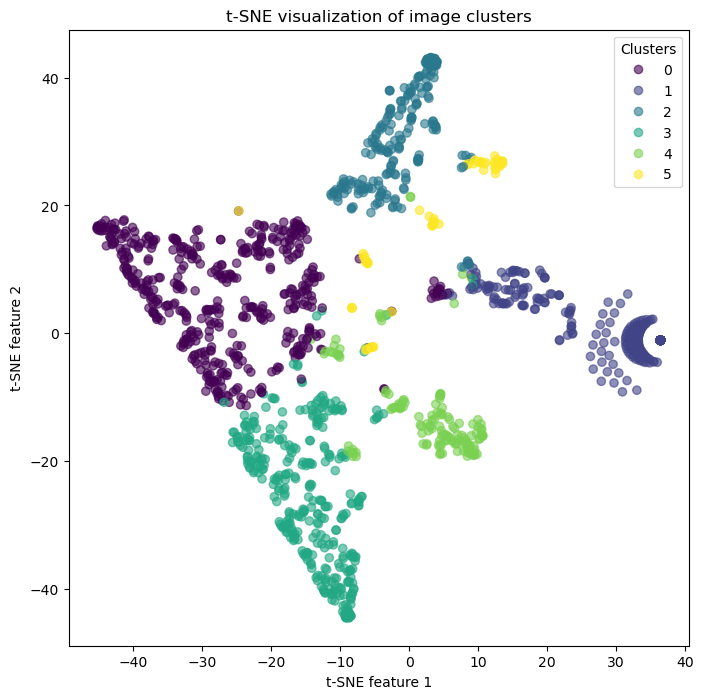

In [45]:
tsne = TSNE(n_components=2, random_state=42)
class_frequencies_2d = tsne.fit_transform(np.array(class_frequencies))

# Plot the clusters
plt.figure(figsize=(8, 8))
scatter = plt.scatter(class_frequencies_2d[:, 0], class_frequencies_2d[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('t-SNE visualization of image clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Add a legend
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

plt.show()

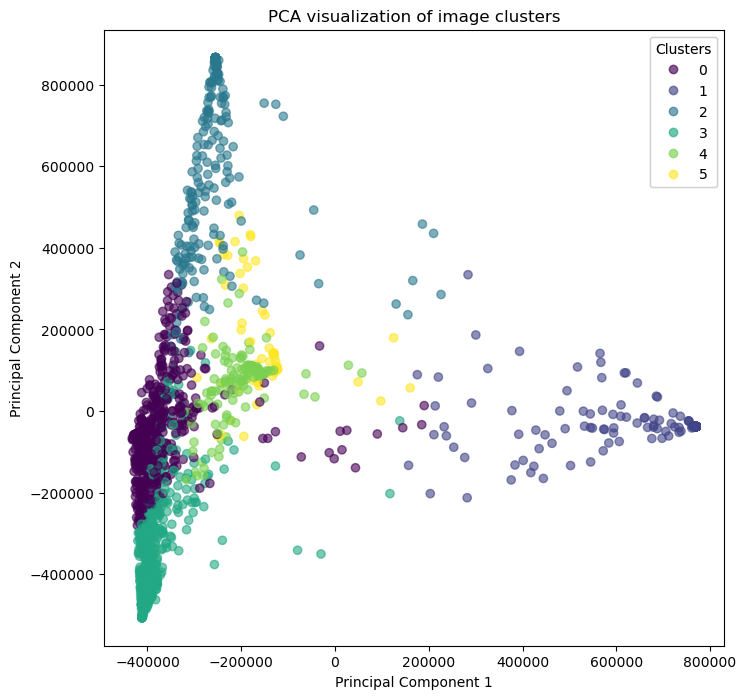

In [46]:
pca = PCA(n_components=2)
class_frequencies_2d = pca.fit_transform(np.array(class_frequencies))

# Plot the clusters
plt.figure(figsize=(8, 8))
scatter = plt.scatter(class_frequencies_2d[:, 0], class_frequencies_2d[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('PCA visualization of image clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), loc="best", title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

In [35]:
scatter.legend_elements()

([<matplotlib.lines.Line2D at 0x148842cd150>,
 ['$\\mathdefault{0}$',
  '$\\mathdefault{2}$',
  '$\\mathdefault{4}$',
  '$\\mathdefault{6}$',
  '$\\mathdefault{8}$',
  '$\\mathdefault{10}$',
  '$\\mathdefault{12}$',
  '$\\mathdefault{14}$'])

In [3]:
test = [('1', '2', 'b'), ('1', '3', 'b')]

In [4]:
test.get('2')

AttributeError: 'list' object has no attribute 'get'

In [7]:
import os

In [8]:
regions = ['D029',
           'D014',
           'D059',
           'D072',
           'D056',
           'D022',
           'D044',
           'D006']

data_path = 'D:\\ann_data'


In [52]:
all_image_paths = [os.path.join(data_path, region, img).replace('/', '\\') for region in regions for img in os.listdir(os.path.join(data_path, region))]
all_mask_paths = {}

for img_path in all_image_paths:
    mask_path = 'D:\\ann_data\\D072\\72-2013-0455-6780-LA93-0M50-E080.jp2.tif'.split(os.sep)
    mask_path.insert(2, 'labels')
    mask_path[4] = os.path.splitext(mask_path[4])[0].replace('.jp2', '_UA2012.tif')
    mask_path = os.sep.join(mask_path)
    all_mask_paths[img_path] = mask_path

all_mask_paths

{'D:\\ann_data\\D029\\29-2012-0160-6835-LA93-0M50-E080.jp2.tif': 'D:\\ann_data\\labels\\D072\\72-2013-0455-6780-LA93-0M50-E080_UA2012.tif',
 'D:\\ann_data\\D029\\29-2012-0155-6840-LA93-0M50-E080.jp2.tif': 'D:\\ann_data\\labels\\D072\\72-2013-0455-6780-LA93-0M50-E080_UA2012.tif',
 'D:\\ann_data\\D029\\29-2012-0165-6835-LA93-0M50-E080.jp2.tif': 'D:\\ann_data\\labels\\D072\\72-2013-0455-6780-LA93-0M50-E080_UA2012.tif',
 'D:\\ann_data\\D029\\29-2012-0220-6775-LA93-0M50-E080.jp2.tif': 'D:\\ann_data\\labels\\D072\\72-2013-0455-6780-LA93-0M50-E080_UA2012.tif',
 'D:\\ann_data\\D029\\29-2012-0155-6870-LA93-0M50-E080.jp2.tif': 'D:\\ann_data\\labels\\D072\\72-2013-0455-6780-LA93-0M50-E080_UA2012.tif',
 'D:\\ann_data\\D029\\29-2012-0140-6815-LA93-0M50-E080.jp2.tif': 'D:\\ann_data\\labels\\D072\\72-2013-0455-6780-LA93-0M50-E080_UA2012.tif',
 'D:\\ann_data\\D029\\29-2012-0150-6840-LA93-0M50-E080.jp2.tif': 'D:\\ann_data\\labels\\D072\\72-2013-0455-6780-LA93-0M50-E080_UA2012.tif',
 'D:\\ann_data\\D029

In [53]:
mask_path = 'D:\\ann_data\\D072\\72-2013-0455-6780-LA93-0M50-E080.jp2.tif'.split(os.sep)
mask_path.insert(2, 'labels')
mask_path[4] = os.path.splitext(mask_path[4])[0].replace('.jp2', '_UA2012.tif')
mask_path = os.sep.join(mask_path)
os.path.basename(mask_path)

'72-2013-0455-6780-LA93-0M50-E080_UA2012.tif'

In [ ]:
os.path.join('labels', region)

In [17]:
all_image_paths

['D:/ann_data\\D029\\29-2012-0160-6835-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0155-6840-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0165-6835-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0220-6775-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0155-6870-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0140-6815-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0150-6840-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0155-6795-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0215-6785-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0145-6785-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0155-6865-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0205-6840-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0155-6855-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0220-6780-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0185-6825-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0160-6780-L

In [18]:
all_mask_paths

{'D:/ann_data\\D029\\29-2012-0160-6835-LA93-0M50-E080.jp2.tif': 'D:/ann_data\\D029\\29-2012-0160-6835-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0155-6840-LA93-0M50-E080.jp2.tif': 'D:/ann_data\\D029\\29-2012-0155-6840-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0165-6835-LA93-0M50-E080.jp2.tif': 'D:/ann_data\\D029\\29-2012-0165-6835-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0220-6775-LA93-0M50-E080.jp2.tif': 'D:/ann_data\\D029\\29-2012-0220-6775-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0155-6870-LA93-0M50-E080.jp2.tif': 'D:/ann_data\\D029\\29-2012-0155-6870-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0140-6815-LA93-0M50-E080.jp2.tif': 'D:/ann_data\\D029\\29-2012-0140-6815-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0150-6840-LA93-0M50-E080.jp2.tif': 'D:/ann_data\\D029\\29-2012-0150-6840-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D029\\29-2012-0155-6795-LA93-0M50-E080.jp2.tif': 'D:/ann_data\\D029\\29-2012-0155-6795-LA93-0M50

In [3]:
import config_test as config
import os

In [91]:
image_files = os.listdir(config.UNSUPERVISED_TRAIN_IMAGE_DIR) + os.listdir(config.SUPERVISED_TRAIN_IMAGE_DIR)
image_files

['D006_0990-6305_41.tif',
 'D006_0990-6310_7.tif',
 'D006_0990-6350_18.tif',
 'D006_0990-6350_65.tif',
 'D006_1000-6295_43.tif',
 'D006_1005-6375_30.tif',
 'D006_1005-6375_53.tif',
 'D006_1010-6285_6.tif',
 'D006_1010-6360_36.tif',
 'D006_1010-6375_10.tif',
 'D006_1015-6280_20.tif',
 'D006_1015-6360_74.tif',
 'D006_1015-6360_76.tif',
 'D006_1015-6365_22.tif',
 'D006_1015-6370_81.tif',
 'D006_1015-6370_91.tif',
 'D006_1020-6275_20.tif',
 'D006_1020-6280_17.tif',
 'D006_1020-6280_4.tif',
 'D006_1020-6280_80.tif',
 'D006_1020-6355_12.tif',
 'D006_1020-6355_39.tif',
 'D006_1020-6360_51.tif',
 'D006_1020-6360_82.tif',
 'D006_1020-6360_89.tif',
 'D006_1025-6280_5.tif',
 'D006_1025-6355_26.tif',
 'D006_1025-6355_79.tif',
 'D006_1025-6360_73.tif',
 'D006_1025-6360_97.tif',
 'D006_1030-6280_4.tif',
 'D006_1030-6280_7.tif',
 'D006_1035-6285_40.tif',
 'D006_1055-6325_56.tif',
 'D006_1055-6325_91.tif',
 'D006_1055-6330_68.tif',
 'D006_1055-6340_81.tif',
 'D006_1055-6345_90.tif',
 'D006_1055-6350_8

In [12]:
os.path.exists(os.path.join(config.UNSUPERVISED_TRAIN_IMAGE_DIR, image_files[1]))

True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1000, 1000, 3) torch.Size([16, 1000, 1000])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ...

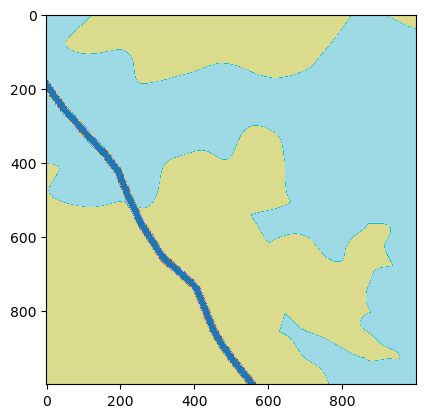

In [96]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import config_test as config
import rasterio
from rasterio.plot import  reshape_as_image
import torch.nn.functional as F
%load_ext autoreload

# Mean and standard deviation for image normalization, that are used for pretrained DeepLabV3
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]


class MiniFranceDataset(Dataset):
    def __init__(self, supervised_train_images_dir=config.SUPERVISED_TRAIN_IMAGE_DIR,
                        train_masks_dir=os.path.join(config.DATA_DIR, "supervised_dataset", "masks"),
                        unsupervised_train_images_dir=config.UNSUPERVISED_TRAIN_IMAGE_DIR,
                        transform=None):

        self.sup_image_dir = supervised_train_images_dir
        self.mask_dir = train_masks_dir
        self.unsup_image_dir = unsupervised_train_images_dir

        self.image_files = os.listdir(supervised_train_images_dir) + os.listdir(unsupervised_train_images_dir)
        self.transformation = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_filename = self.image_files[idx]

        if os.path.exists(os.path.join(self.sup_image_dir, image_filename)):

            image_path = os.path.join(self.sup_image_dir, image_filename)
            mask_path = os.path.join(self.mask_dir,
                                         f"mask_{os.path.splitext(image_filename)[0]}.tif")

            image = reshape_as_image(rasterio.open(image_path).read())

            if self.transformation:
                image = self.transformation(image)

            mask = rasterio.open(mask_path).read(1)
            mask = torch.from_numpy(mask).long()  # Convert numpy array to LongTensor

            # Check if the mask contains valid class indices
            if not torch.all((mask >= 0) & (mask < config.NUM_CLASSES)):
                raise ValueError(f"Mask values must be between 0 and {config.NUM_CLASSES - 1}")

            # One hot encode to convert masks shape into [num_classes, size_x, size_y]
            # from [num_channels, size_x, size_y]
            mask = F.one_hot(mask, config.NUM_CLASSES)
            mask = mask.permute(2, 0, 1).float()

        else:
            # Used for unsupervised data part
            image_path = os.path.join(self.unsup_image_dir, image_filename)

            image = reshape_as_image(rasterio.open(image_path).read())

            image = reshape_as_image(rasterio.open(image_path).read())

            if self.transformation:
                image = self.transformation(image)

            mask = [] # For compatability with DataLoader (does not accept None)
        return image, mask

dataset = MiniFranceDataset()

import matplotlib.pyplot as plt

images = dataset[43][0]
mask = dataset[43][1]
print(images.shape, mask.shape )
print(mask)
mask = torch.argmax(mask, dim=0)
plt.imshow(mask, cmap='tab20', aspect='equal')

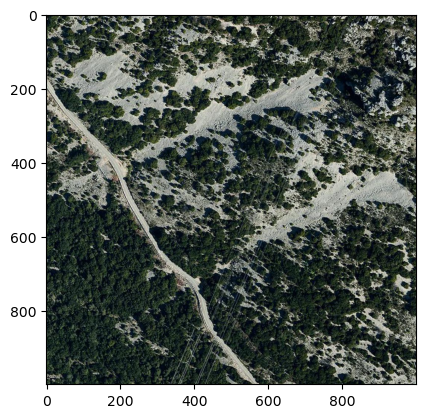

In [97]:
plt.imshow(images, cmap='tab20', aspect='equal')


In [73]:
test = torch.tensor([2.9500e-01, 6.1394e-02, 4.3657e-02, 3.2919e-03, 7.0766e-03, 2.0511e-01,
        5.5594e-03, 2.0102e-01, 0.0000e+00, 0.0000e+00, 1.3345e-01, 1.6981e-02,
        6.9775e-03, 1.2771e-02, 7.5612e-03, 1.4962e-04])
test * 100

tensor([2.9500e+01, 6.1394e+00, 4.3657e+00, 3.2919e-01, 7.0766e-01, 2.0511e+01,
        5.5594e-01, 2.0102e+01, 0.0000e+00, 0.0000e+00, 1.3345e+01, 1.6981e+00,
        6.9775e-01, 1.2771e+00, 7.5612e-01, 1.4962e-02])

### Model testing

In [1]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import config_test as config
import rasterio
from rasterio.plot import  reshape_as_image
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset
import torchvision
from torchvision import transforms
from torchvision.models.segmentation import deeplabv3_resnet50
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
import torch.optim as optim
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from typing import Any
from collections import namedtuple

import data_handling_test as dh

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload

torch.cuda.empty_cache()

class ModelWrapper(torch.nn.Module):
    """
    Wrapper class for model with dict/list rvalues.
    """

    def __init__(self, model: torch.nn.Module) -> None:
        """
        Init call.
        """
        super().__init__()
        self.model = model

    def forward(self, input_x: torch.Tensor) -> Any:
        """
        Wrap forward call.
        """
        data = self.model(input_x)

        if isinstance(data, dict):
            data_named_tuple = namedtuple("ModelEndpoints", sorted(data.keys()))  # type: ignore
            data = data_named_tuple(**data)  # type: ignore

        elif isinstance(data, list):
            data = tuple(data)

        return data

num_epochs = 2
num_samples = 20
num_classes = config.NUM_CLASSES
image_size = config.image_size
batch_size = config.batch_size

supervised_loader_train, supervised_loader_val, unsupervised_loader_train, unsupervised_loader_val = dh.create_data_loaders(batch_size, 0.5, perform_stratiication= True)

model = deeplabv3_resnet50(pretrained = config.pretrained_backbone)
model.classifier = DeepLabHead(2048, config.NUM_CLASSES)
model = model.to(config.device)

model_wrapper = ModelWrapper(model)
sample_data = next(iter(supervised_loader_train))[0].to('cuda')
image_grid = torchvision.utils.make_grid(sample_data)

trainable_parameters = filter(lambda p: p.requires_grad, model.parameters())
optimizer = optim.Adam(trainable_parameters)
criterion = nn.BCEWithLogitsLoss()

Data clusterized and stratified


In [6]:
sample_mask = next(iter(supervised_loader_train))[1].to('cuda')

In [3]:
model.train()
optimizer.zero_grad()
output = model(sample_data)
output_prediction = output['out']
output_prediction.shape

torch.Size([2, 16, 1000, 1000])

In [7]:
sample_mask.shape

torch.Size([2, 16, 1000, 1000])

In [29]:
_, predicted = torch.max(output_prediction, 1)
predicted.shape

torch.Size([2, 1000, 1000])

In [35]:
predicted

tensor([[[ 0,  0,  0,  ..., 15, 15, 15],
         [ 0,  0,  0,  ..., 15, 15, 15],
         [ 0,  0,  0,  ..., 15, 15, 15],
         ...,
         [ 6,  6,  6,  ...,  2,  2,  2],
         [ 6,  6,  6,  ...,  2,  2,  2],
         [ 6,  6,  6,  ...,  2,  2,  2]],

        [[ 6,  6,  6,  ..., 11, 11, 11],
         [ 6,  6,  6,  ..., 11, 11, 11],
         [ 6,  6,  6,  ..., 11, 11, 11],
         ...,
         [ 0,  0,  0,  ..., 11, 11, 11],
         [ 0,  0,  0,  ..., 11, 11, 11],
         [ 0,  0,  0,  ..., 11, 11, 11]]], device='cuda:0')

In [30]:
_, true_mask = torch.max(sample_mask, 1)
true_mask.shape

torch.Size([2, 1000, 1000])

In [40]:
import torchmetrics as metrics

jaccard_metric = metrics.JaccardIndex(num_classes=16, task = 'multiclass').to('cuda')
dice_metric = metrics.Dice(num_classes=16).to('cuda')

jaccard_metric.update(predicted, true_mask)
dice_metric.update(predicted, true_mask)

jaccard_score = jaccard_metric.compute()
dice_score = dice_metric.compute()

In [41]:
jaccard_score

tensor(0.0284, device='cuda:0')

In [42]:
dice_score

tensor(0.4543, device='cuda:0')

In [31]:
for i in range(predicted.size(0)):
    predicted_mask = predicted[i, :, :]
    mask = true_mask[i, :, :,]
    correct = (predicted == mask).sum().item()
    total = true_mask.numel()
    print(correct/total)

0.4542995
0.4542995


In [32]:
correct = (predicted == true_mask).sum().item()
correct

908599

In [33]:
total = true_mask.numel()
total

2000000

In [34]:
correct / total

0.4542995

In [ ]:
output_prediction

In [15]:
def calculate_accuracy(output, target):
    _, predicted = torch.max(output, 1)
    correct = (predicted == target).sum().item()
    total = target.numel()
    return correct / total

In [16]:
for epoch in range(num_epochs):
        print(epoch)
        model.train()
            
        for batch_idx, (image, mask) in enumerate(supervised_loader_train):
            image, mask = image.to('cuda'), mask.to('cuda')
            optimizer.zero_grad()
            output = model(image)
            output_prediction = output['out']
            
            loss = criterion(output_prediction, mask)
            writer.add_scalar('Supervised Training loss', loss.item(), epoch * len(supervised_loader_train) + batch_idx)
            loss.backward()
            optimizer.step()
            
            
        print('Evaluation')
        model.eval()
        total_loss = 0
        total_unsupervised_loss = 0
        total_accuracy = 0
        
        with torch.no_grad():
            for batch_idx, (image, mask) in enumerate(supervised_loader_val):
                image, mask = image.to('cuda'), mask.to('cuda')
                output = model(image)
                output_prediction = output['out']
                
                loss = criterion(output_prediction, mask)
                total_loss += loss.item()
                
                accuracy = calculate_accuracy(output_prediction, mask)
                total_accuracy += total_accuracy
                
        avg_loss = total_loss / len(supervised_loader_val)
        avg_accuracy = total_accuracy / len(supervised_loader_val)
        writer.add_scalar('Supervised Validation Loss', avg_loss, epoch)
        writer.add_scalar('Accuracy', avg_accuracy, epoch)
        
        print(f'Epoch {epoch+1}, Loss: {avg_loss}')

writer.close()

0


KeyboardInterrupt: 

In [43]:
import src.config as config

In [44]:
config.print_config()

Configuration:
Data Directory: C:\Users\edvar\PycharmProjects\miniFrance_project\data
Image Size: (1000, 1000)
Number of Classes: 16
Backbone: resnet50, is pretrained? True
Device for torch: cuda


In [45]:
config.NUM_CLASSES

16

In [47]:
resnet50 = {'backbone': 'resnet50',
            'pretrained_backbone': True,
            'num_epochs': 50,
            'num_samples': 20,
            'batch_size': 2,
            'image_size': (1000, 1000)}

for key in resnet50:
    print(f'Configuration: {key}, Value: {resnet50[key]}')

0 backbone
1 pretrained_backbone
2 num_epochs
3 num_samples
4 batch_size
5 image_size
